In [1]:
import pandas as pd
path = 'DataForThai.csv'
df = pd.read_csv(path)

In [2]:
df

,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,2020-01-22,2.0,0.0,0,NaN,NaN
1,2020-01-23,3.0,0.0,0,1.0,0.500000
2,2020-01-24,5.0,0.0,0,2.0,0.666667
3,2020-01-25,7.0,0.0,0,2.0,0.400000
4,2020-01-26,8.0,0.0,2,1.0,0.142857
...,...,...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593,29.0,0.010972
86,2020-04-17,2700.0,47.0,1689,28.0,0.010479
87,2020-04-18,2733.0,47.0,1787,33.0,0.012222
88,2020-04-19,2765.0,47.0,1928,32.0,0.011709


In [ ]:
df_thai

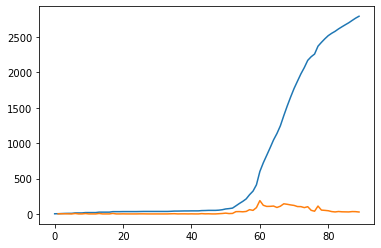

In [15]:
import matplotlib.pyplot as plt
plt.plot(df['Confirmed'])
plt.plot(df['daily_new_patient'])



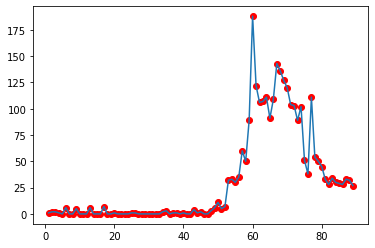

In [55]:
plt.plot(df['daily_new_patient'],'ro')
plt.plot(df['daily_new_patient'],)

In [18]:
df_thai = df.copy()
df_thai

,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,2020-01-22,2.0,0.0,0,NaN,NaN
1,2020-01-23,3.0,0.0,0,1.0,0.500000
2,2020-01-24,5.0,0.0,0,2.0,0.666667
3,2020-01-25,7.0,0.0,0,2.0,0.400000
4,2020-01-26,8.0,0.0,2,1.0,0.142857
...,...,...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593,29.0,0.010972
86,2020-04-17,2700.0,47.0,1689,28.0,0.010479
87,2020-04-18,2733.0,47.0,1787,33.0,0.012222
88,2020-04-19,2765.0,47.0,1928,32.0,0.011709


In [21]:
df_thai = df_thai.fillna(0)

In [23]:
df_thai.head()

,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,2020-01-22,2.0,0.0,0,0.0,0.000000
1,2020-01-23,3.0,0.0,0,1.0,0.500000
2,2020-01-24,5.0,0.0,0,2.0,0.666667
3,2020-01-25,7.0,0.0,0,2.0,0.400000
4,2020-01-26,8.0,0.0,2,1.0,0.142857


In [31]:
import numpy as np

ydata = [i for i in df_thai.daily_new_patient]
ydata = np.array(ydata, dtype=float)
ydata
# xdata = country_df.day_count
# ydata = np.array(ydata, dtype=float)
# xdata = np.array(xdata, dtype=float)

array([  0.,   1.,   2.,   2.,   1.,   0.,   6.,   0.,   0.,   5.,   0.,
         0.,   0.,   6.,   0.,   0.,   0.,   7.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   3.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   4.,
         1.,   2.,   0.,   0.,   3.,   6.,  11.,   5.,   7.,  32.,  33.,
        30.,  35.,  60.,  50.,  89., 188., 122., 106., 107., 111.,  91.,
       109., 143., 136., 127., 120., 104., 103.,  89., 102.,  51.,  38.,
       111.,  54.,  50.,  45.,  33.,  28.,  34.,  30.,  29.,  28.,  33.,
        32.,  27.])

In [32]:
xdata = np.arange(len(ydata))
xdata
# xdata = np.array(xdata, dtype=float)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

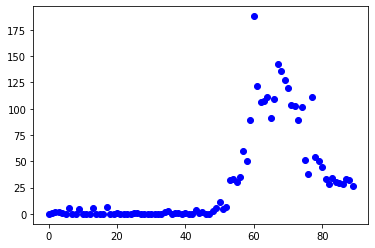

In [53]:
plt.plot(xdata, ydata,'bo')

In [49]:
N = 69625582.0

# initial condtion
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = gamma*y[1]
    return sus, inf, rec

In [50]:
def fit_odeint(x, beta, gamma):
#      return integrate.solve_ivp(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

In [51]:
from scipy import integrate, optimize

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

In [52]:
popt

array([1., 1.])

In [44]:
pcov

array([[inf, inf],
       [inf, inf]])

In [45]:
y

NameError: name 'y' is not defined

In [3]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [4]:
S_0 = 100000
I_0 = 2
R_0 = 10

In [5]:
data = df['Confirmed'] - df['Recovered'] - df['Deaths']
recovered = df['Recovered']
print(recovered)
print(data)

0        0
1        0
2        0
3        0
4        2
      ... 
85    1593
86    1689
87    1787
88    1928
89    1999
Name: Recovered, Length: 90, dtype: int64
0        2.0
1        3.0
2        5.0
3        7.0
4        6.0
       ...  
85    1033.0
86     964.0
87     899.0
88     790.0
89     746.0
Length: 90, dtype: float64


In [6]:
def train_model():
    optimal = minimize(loss, [0.001, 0.001], args=(data, ))

In [7]:
def loss(point, data, recovered, ):
    beta, gamma = point
    size = len(data)
    def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I - gamma*I, gamma*I ]
solution = solve_ivp(SIR, [0, size], [s_0, i_0, R_0], t_eval=np.arange(0,size,1),vectorized=True)

IndentationError: expected an indented block (<ipython-input-7-835e6a23a03e>, line 5)

In [ ]:
from scipy.integrate import odeint

def SIR(y,t):
    beta, gamma = point
    size = len(data)
    S = y[0]
    I = y[1]  
    R = y[2]
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]
            
y0 = [7e2,2,10]
t = np.linspace(0,20,len(data))            
solution = odeint(SIR,y0,t)        
# print(solution)         
y = odeint(SIR,y0,t)
print(solution[:,1])
# S = y[:,1]
print(y[:,1].shape)
print(data.shape)
l1= np.sqrt(np.mean(y[:,1]-data)**2)
l2= np.sqrt(np.mean(y[:,2]-recovered)**2)
alpha = 0.5
a = alpha*l1+(1-alpha)*l2
print(l1)
print(l2)
print(a)
print(S.shape)

In [ ]:

def lossFunction(point , data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    
    def SIR1(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I - gamma*I, gamma*I ]
lossFuntion()


In [ ]:
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y**2
sol = solve_ivp(exponential_decay, [0, 1], [2, 3, 8])
print(sol.t)

print(sol.y)

In [ ]:
point = 0.0004,0.05
beta, gamma = point
print('beta = ',beta)
print('gamma = ', gamma)
n=100000
ii = 2
ri = 10
si=n-ii-ri

In [ ]:
from scipy import integrate

def lossFunc(point, data, recovered, si, ii , ri):
    beta, gamma = point
    size = len(data)
    def SIR(t,y):
        S,I,R = y

        dSdt = -beta*S*I
        dIdt = beta*S*I - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]

    sol = integrate.solve_ivp(SIR, (0,size), (10000,2,10), t_eval=np.arange(0,size,1), vectorized=True )
    print(sol.y[1].shape)
    print(data.shape)
    l1= np.sqrt(np.mean(sol.y[1]-data)**2)
    l2= np.sqrt(np.mean(sol.y[2]-recovered)**2)
    alpha = 0.7
    a = alpha*l1+(1-alpha)*l2
    return a
print('error = ',a)

print(sol.y[1])
print(data)

plt.plot(x, data)
plt.plot(x,sol.y[1])

In [ ]:
from scipy.optimize import minimize

optimal = minimize(lossFunc, [0.001, 0.001], args=(data, recovered, si, ii, ri), method='L-BFGS-B', bounds = [(0.00000001,0.4),(0.00000001,0.4)])
print(optimal)
print(optimal.x)


In [ ]:
# compare
# beta = optimal.x[0]
# gamma = optimal.x[1]

beta = 0.0001
gamma = 0.001


def SIR(y,t):
    S,I,R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]
y0  = (si, ii, ri)
y = odeint(SIR,y0,t)
# sol = integrate.solve_ivp(SIR, (0,size), (10000,2,10), t_eval=np.arange(0,size,1), vectorized=True )
# dif = y[:,1] - data
# dif

x = np.arange(0,size,1)
# plt.plot(x,y[:,1])
plt.plot(x,data)

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0,size,1)
plt.plot(x,y[:,1])
plt.plot(x,data)

In [ ]:
x = np.arange(22)

In [ ]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'gtol': 1e-6, 'disp': True})

res.x
print(res.message)
res.hess_inv

In [11]:
df.head(90)

,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,2020-01-22,2.0,0.0,0,NaN,NaN
1,2020-01-23,3.0,0.0,0,1.0,0.500000
2,2020-01-24,5.0,0.0,0,2.0,0.666667
3,2020-01-25,7.0,0.0,0,2.0,0.400000
4,2020-01-26,8.0,0.0,2,1.0,0.142857
...,...,...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593,29.0,0.010972
86,2020-04-17,2700.0,47.0,1689,28.0,0.010479
87,2020-04-18,2733.0,47.0,1787,33.0,0.012222
88,2020-04-19,2765.0,47.0,1928,32.0,0.011709


https://www.worldometers.info/world-population/thailand-population/
Population of Thailand 2019 : 69,625,582	

In [10]:
population = float( 69625582)

country_df = pd.DataFrame()